In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spam.csv', encoding = 'latin1')
#Reading the csv file 

In [3]:
df.head() # printing the first five columns

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isnull().sum() # checking the no of null values present in the dataset

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.shape #checking the shape of the dataset

(5572, 5)

In [6]:
#This following are the processing that we need to do in every project of the dataset
#1. Data Cleaning
#2.EDA
#3.Text Preprocessing
#4.Model Building
#5.Evaluation
#6.Improvement
#7.Website and then deployment


## Data Cleaning

In [7]:
# dropping the last three columns 
df.drop(columns=['Unnamed: 3','Unnamed: 2','Unnamed: 4'],inplace=True)
df.sample(5) #printing random 5 rows , if 5 not passed it will print only one random row

,v1,v2
5529,ham,What about this one then.
2172,ham,Yavnt tried yet and never played original either
3754,ham,"\Im on gloucesterroad what are uup to later?\"""""
5377,spam,The current leading bid is 151. To pause this ...
4981,ham,Slept? I thinkThis time ( &lt;#&gt; pm) is no...


In [8]:
#Changing names of columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample()

,target,text
1405,ham,K..k..any special today?


In [10]:
#Applying label encoding 
#
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#1-spam , 2- non spam

#check for duplicate values
df.duplicated().sum()

403

In [14]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## EDA

In [17]:
#2.EDA
df.target.value_counts() # unbalanced data

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x2442e3d32c8>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Non-Spam'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

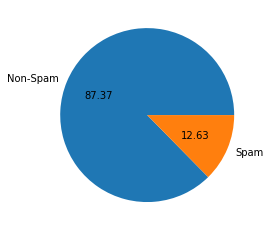

In [18]:
plt.pie(df.target.value_counts(),labels=['Non-Spam','Spam'],autopct='%0.2f')

In [19]:
import nltk 

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANKET\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#1.1st column is no of character in sms 2.no of words in sms 3. no of sentences in sms

df['num_character']=df['text'].apply(len)

In [22]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['text'].apply(lambda x: nltk.word_tokenize(x)) # words in sms
   
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x))) #Number of words

In [24]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) #Number of words

In [26]:
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_character','num_words','num_sentence']].describe()


,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286903,1.961308
std,58.236293,13.227173,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [28]:
df[df['target']==0][['num_character','num_words','num_sentence']].describe()
#For HAM or non spam

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [29]:
df[df['target']==1][['num_character','num_words','num_sentence']].describe()
#spam

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


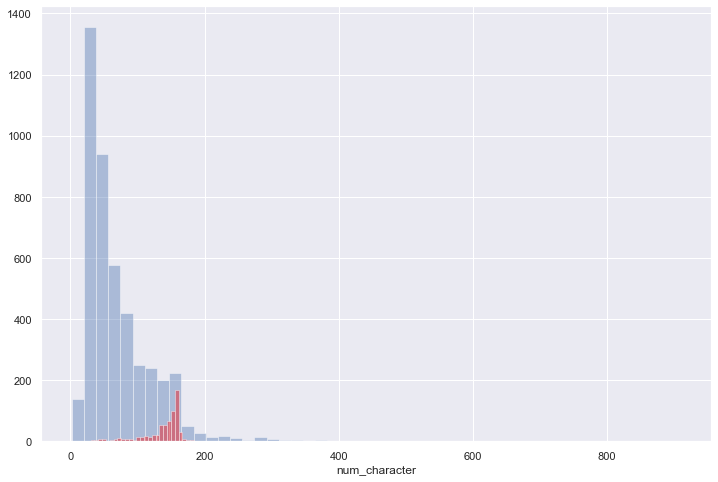

In [30]:
sns.set(style="darkgrid")

plt.figure(figsize=(12,8))
sns.distplot(df[df['target']==0]['num_character'],kde=False)
sns.distplot(df[df['target']==1]['num_character'],color='red',kde=False)

This plot explain us that most of the Ham messages are of maximum lenght and most of the Spam messages are of small length

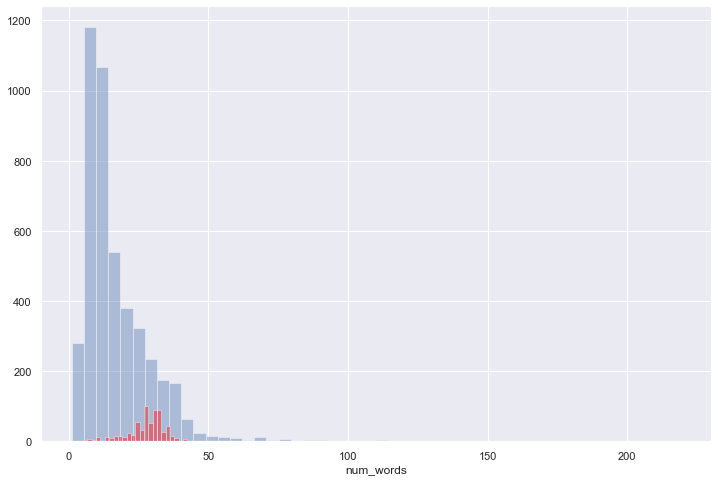

In [31]:
sns.set(style="darkgrid")

plt.figure(figsize=(12,8))
sns.distplot(df[df['target']==0]['num_words'],kde=False)
sns.distplot(df[df['target']==1]['num_words'],color='red',kde=False)

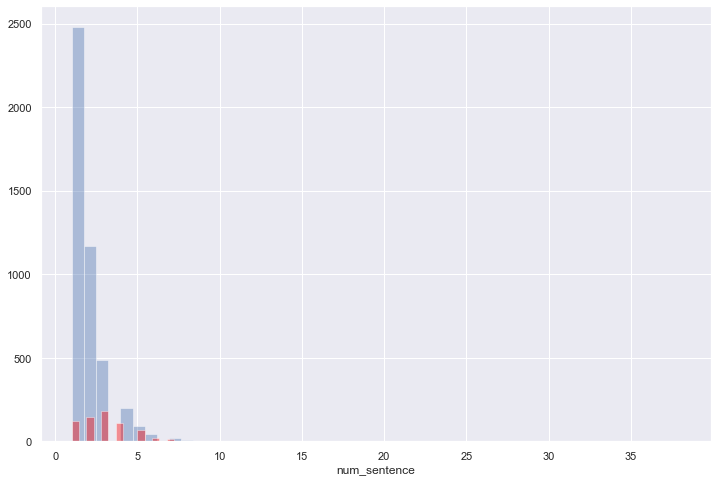

In [32]:
sns.set(style="darkgrid")

plt.figure(figsize=(12,8))
sns.distplot(df[df['target']==0]['num_sentence'],kde=False)
sns.distplot(df[df['target']==1]['num_sentence'],color='red',kde=False)

In [33]:
df.corr('pearson')

,target,num_character,num_words,num_sentence
target,1.000000,0.384717,0.264160,0.267602
num_character,0.384717,1.000000,0.965309,0.626118
num_words,0.264160,0.965309,1.000000,0.683584
num_sentence,0.267602,0.626118,0.683584,1.000000


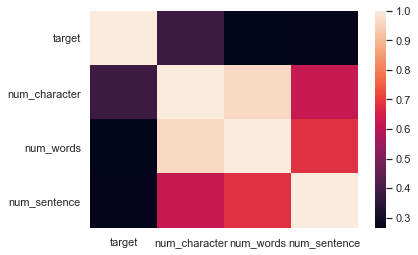

In [34]:
sns.heatmap(df.corr())

this above plot is showing that the num_character,num_word,and num_sentence are dependent on each other
so as the feature are more dependent on each other , we need to take only one feature out of them

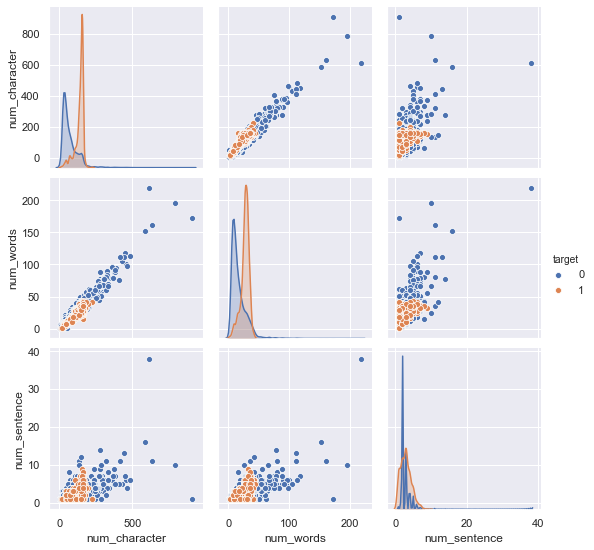

In [35]:
sns.pairplot(df,hue='target')

## Data preprocessing
 - lower case
 - tokenization
 - removing special characters
 - removing stop words
 - stemming or lemitization -converting dance,dancing ,danced into dance

In [36]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps=PorterStemmer()
stopwords.words('english')

def transform_text(text):
    text=text.lower()  # we are converting the text into the lower case
    text=nltk.word_tokenize(text)  # we are tokenize it. i.e converting sentence into list of words seperated by space
    #since we have get the list we are  applying loop for removing special character
    y=[]
    for i  in text:  # removing special character
        if i.isalnum():
            y.append(i)
    
    text=y[:] # you can't copy the list directly we need to clone it 
    y.clear()
    
    for i in text:   #stop words removing
        if i not in stopwords.words('english') and i  not in string.punctuation:
                y.append(i)
                
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

        
    return " ".join(y)

In [37]:
df['transformed_text']=df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

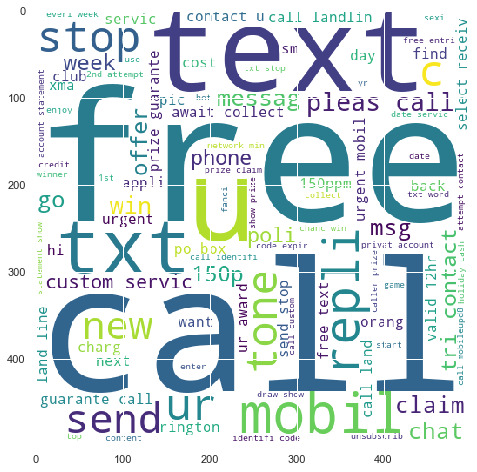

In [41]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

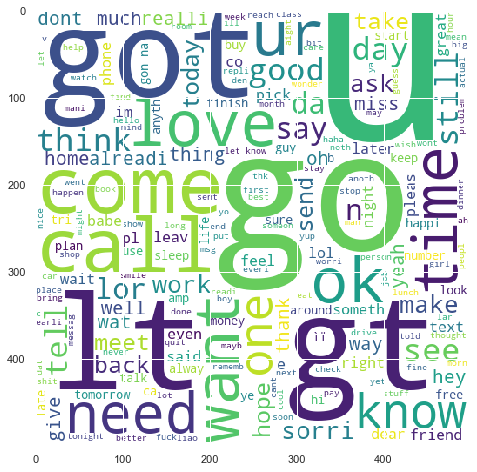

In [42]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [43]:
#top 30 word that are used in ham and spam message
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [45]:
len(spam_corpus)

9883

In [46]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [47]:
#We are making dataframe of it.

pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

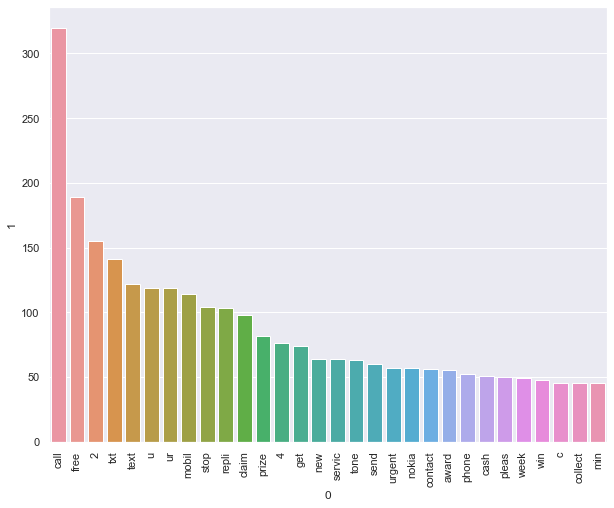

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [49]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
print(len(ham_corpus))
Counter(ham_corpus).most_common(30)

34773


[('u', 871),
 ('go', 401),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 272),
 ('got', 236),
 ('like', 234),
 ('know', 234),
 ('call', 232),
 ('time', 217),
 ('good', 212),
 ('want', 208),
 ('ok', 207),
 ('love', 206),
 ('ur', 197),
 ('day', 184),
 ('need', 170),
 ('one', 164),
 ('4', 156),
 ('lor', 153),
 ('think', 149),
 ('home', 149),
 ('see', 145),
 ('still', 142),
 ('take', 141),
 ('da', 133),
 ('tell', 133),
 ('make', 129)]

In [50]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,272
7,got,236
8,like,234
9,know,234


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

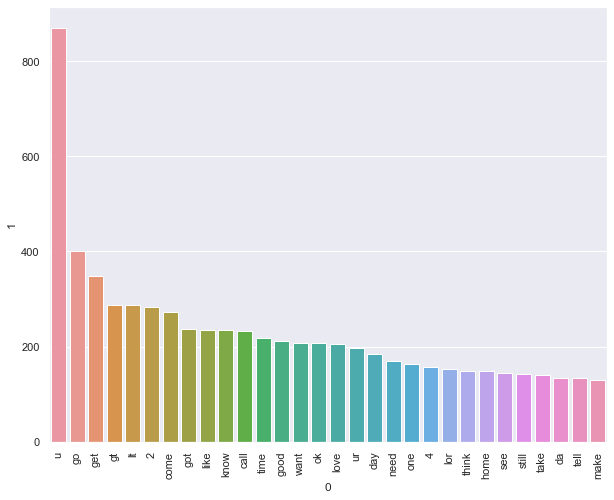

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

## Model building

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [53]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [55]:
X.shape

(5169, 3000)

In [56]:
y=df['target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [63]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8728018757327081
[[1293  179]
 [  38  196]]
0.5226666666666666


In [64]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9689331770222743
[[1470    2]
 [  51  183]]
0.9891891891891892


In [65]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718640093786636
[[1465    7]
 [  41  193]]
0.965


In [66]:
#Using TfidfVectorizer
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
X.shape

(5169, 3000)

In [68]:
y=df['target'].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8728018757327081
[[1293  179]
 [  38  196]]
0.5226666666666666


In [73]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9689331770222743
[[1470    2]
 [  51  183]]
0.9891891891891892


In [74]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718640093786636
[[1465    7]
 [  41  193]]
0.965


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KNN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [78]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [79]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9794841735052755, 0.9671361502347418)

In [80]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9794841735052755
Precision -  0.9671361502347418
For  KNN
Accuracy -  0.902696365767878
Precision -  1.0
For  NB
Accuracy -  0.9689331770222743
Precision -  0.9891891891891892
For  DT
Accuracy -  0.9378663540445487
Precision -  0.8478260869565217
For  LR
Accuracy -  0.9472450175849941
Precision -  0.9044943820224719
For  RF
Accuracy -  0.97010550996483
Precision -  0.9893048128342246
For  AdaBoost
Accuracy -  0.9613130128956624
Precision -  0.9038461538461539
For  BgC
Accuracy -  0.958968347010551
Precision -  0.8727272727272727
For  ETC
Accuracy -  0.9788980070339977
Precision -  0.9852941176470589
For  GBDT
Accuracy -  0.9472450175849941
Precision -  0.95
For  xgb
Accuracy -  0.9689331770222743
Precision -  0.9414634146341463


In [81]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))